# **INTRODUCTION**

**This project analyzes Amazon product data to extract insights related to pricing, customer ratings, and estimated top-selling products. The goal is to provide valuable insights that can guide Amazon sellers and platform managers in pricing, product ratings, and top-seller identification.**

# **1. Data Loading and Preprocessing**

In this section, we load the Amazon product dataset and perform basic data preprocessing. This includes converting relevant columns to numeric data types, which allows us to perform statistical calculations for our analyses.


In [1]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

file_path = '/kaggle/input/amazon-sales-dataset/amazon.csv' 
amazon_data = pd.read_csv(file_path)

In [3]:
# Display basic information and preview the first few rows
amazon_data.info()
amazon_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **2. DATA CLEANING & PREPARATION**

Before analyzing the data, it's important to clean and prepare it. Here are the main data cleaning steps taken:
1. **Changing Data Types**: Convert columns from object to float for easier analysis.
2. **Filling in Missing Information**: Handle missing values in critical columns.
3. **Checking for Duplicate Rows**: Remove duplicate rows to prevent skewed results.


### Changing Data Types

In [4]:
# Convert relevant columns to numeric types, handling non-numeric symbols
amazon_data['discounted_price'] = amazon_data['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].replace('[₹,]', '', regex=True).astype(float)
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')
amazon_data['rating_count'] = amazon_data['rating_count'].replace(',', '', regex=True).astype(float)


### Filling in Missing Information

In [5]:
# Check for missing values and fill if necessary
amazon_data.fillna({
    'discounted_price': amazon_data['discounted_price'].mean(),
    'actual_price': amazon_data['actual_price'].mean(),
    'rating': amazon_data['rating'].mean(),
    'rating_count': 0  # Assuming products with no reviews have a rating count of 0
}, inplace=True)


### Checking for Duplicate Rows

In [6]:
# Check for and remove duplicates
initial_row_count = len(amazon_data)
amazon_data.drop_duplicates(inplace=True)
print(f"Removed {initial_row_count - len(amazon_data)} duplicate rows.")


Removed 0 duplicate rows.


# **3. PRICE ANALYSIS**

In this section, we analyze product prices by calculating:
- **Average Discounted Price**: Average price after discount.
- **Minimum and Maximum Discounted Prices**: Price range within each category.
- **Average Actual Price**: Average original price before discounts.


In [7]:
# Calculate average, minimum, and maximum prices by product category
price_stats = amazon_data.groupby('category').agg(
    avg_discounted_price=('discounted_price', 'mean'),
    min_discounted_price=('discounted_price', 'min'),
    max_discounted_price=('discounted_price', 'max'),
    avg_actual_price=('actual_price', 'mean'),
    min_actual_price=('actual_price', 'min'),
    max_actual_price=('actual_price', 'max')
).reset_index()

# Display the calculated price statistics
price_stats

,category,avg_discounted_price,min_discounted_price,max_discounted_price,avg_actual_price,min_actual_price,max_actual_price
0,Car&Motorbike|CarAccessories|InteriorAccessori...,2339.000000,2339.0,2339.0,4000.000000,4000.0,4000.0
1,Computers&Accessories|Accessories&Peripherals|...,221.500000,149.0,294.0,2699.000000,399.0,4999.0
2,Computers&Accessories|Accessories&Peripherals|...,649.000000,649.0,649.0,999.000000,999.0,999.0
3,Computers&Accessories|Accessories&Peripherals|...,574.000000,199.0,949.0,1249.500000,499.0,2000.0
4,Computers&Accessories|Accessories&Peripherals|...,749.000000,649.0,849.0,1399.500000,1300.0,1499.0
...,...,...,...,...,...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,150.000000,50.0,250.0,150.000000,50.0,250.0
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,255.000000,90.0,420.0,260.000000,100.0,420.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,329.000000,178.0,480.0,405.000000,210.0,600.0
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,244.333333,120.0,341.0,296.666667,120.0,450.0


### **VISUALIZATION OF PRICE ANALYSIS**
**Step 1: Select Top 6 Categories Based on Average Discounted Price**
We select the top 6 categories based on the `avg_discounted_price` to focus on the highest average prices.

**Step 2: Create Subplots for Visualization**
A 2x2 grid of subplots is created to display 4 visualizations:

- **Top-left Plot**: Displays the average discounted price by category.
- **Top-right Plot**: Displays the minimum discounted price by category.
- **Bottom-left Plot**: Displays the maximum discounted price by category.
- **Bottom-right Plot**: Displays the average actual price by category.

**Step 3: Adjust X-axis Labels for Readability**
The x-axis labels (category names) are rotated by 45 degrees for better visibility and alignment.

**Step 4: Adjust Layout for Better Spacing**
The layout is adjusted to ensure proper spacing between the subplots using `subplots_adjust()`.

**Step 5: Display the Visualizations**
Finally, the `plt.show()` function is used to display the visualizations with the adjusted layout.


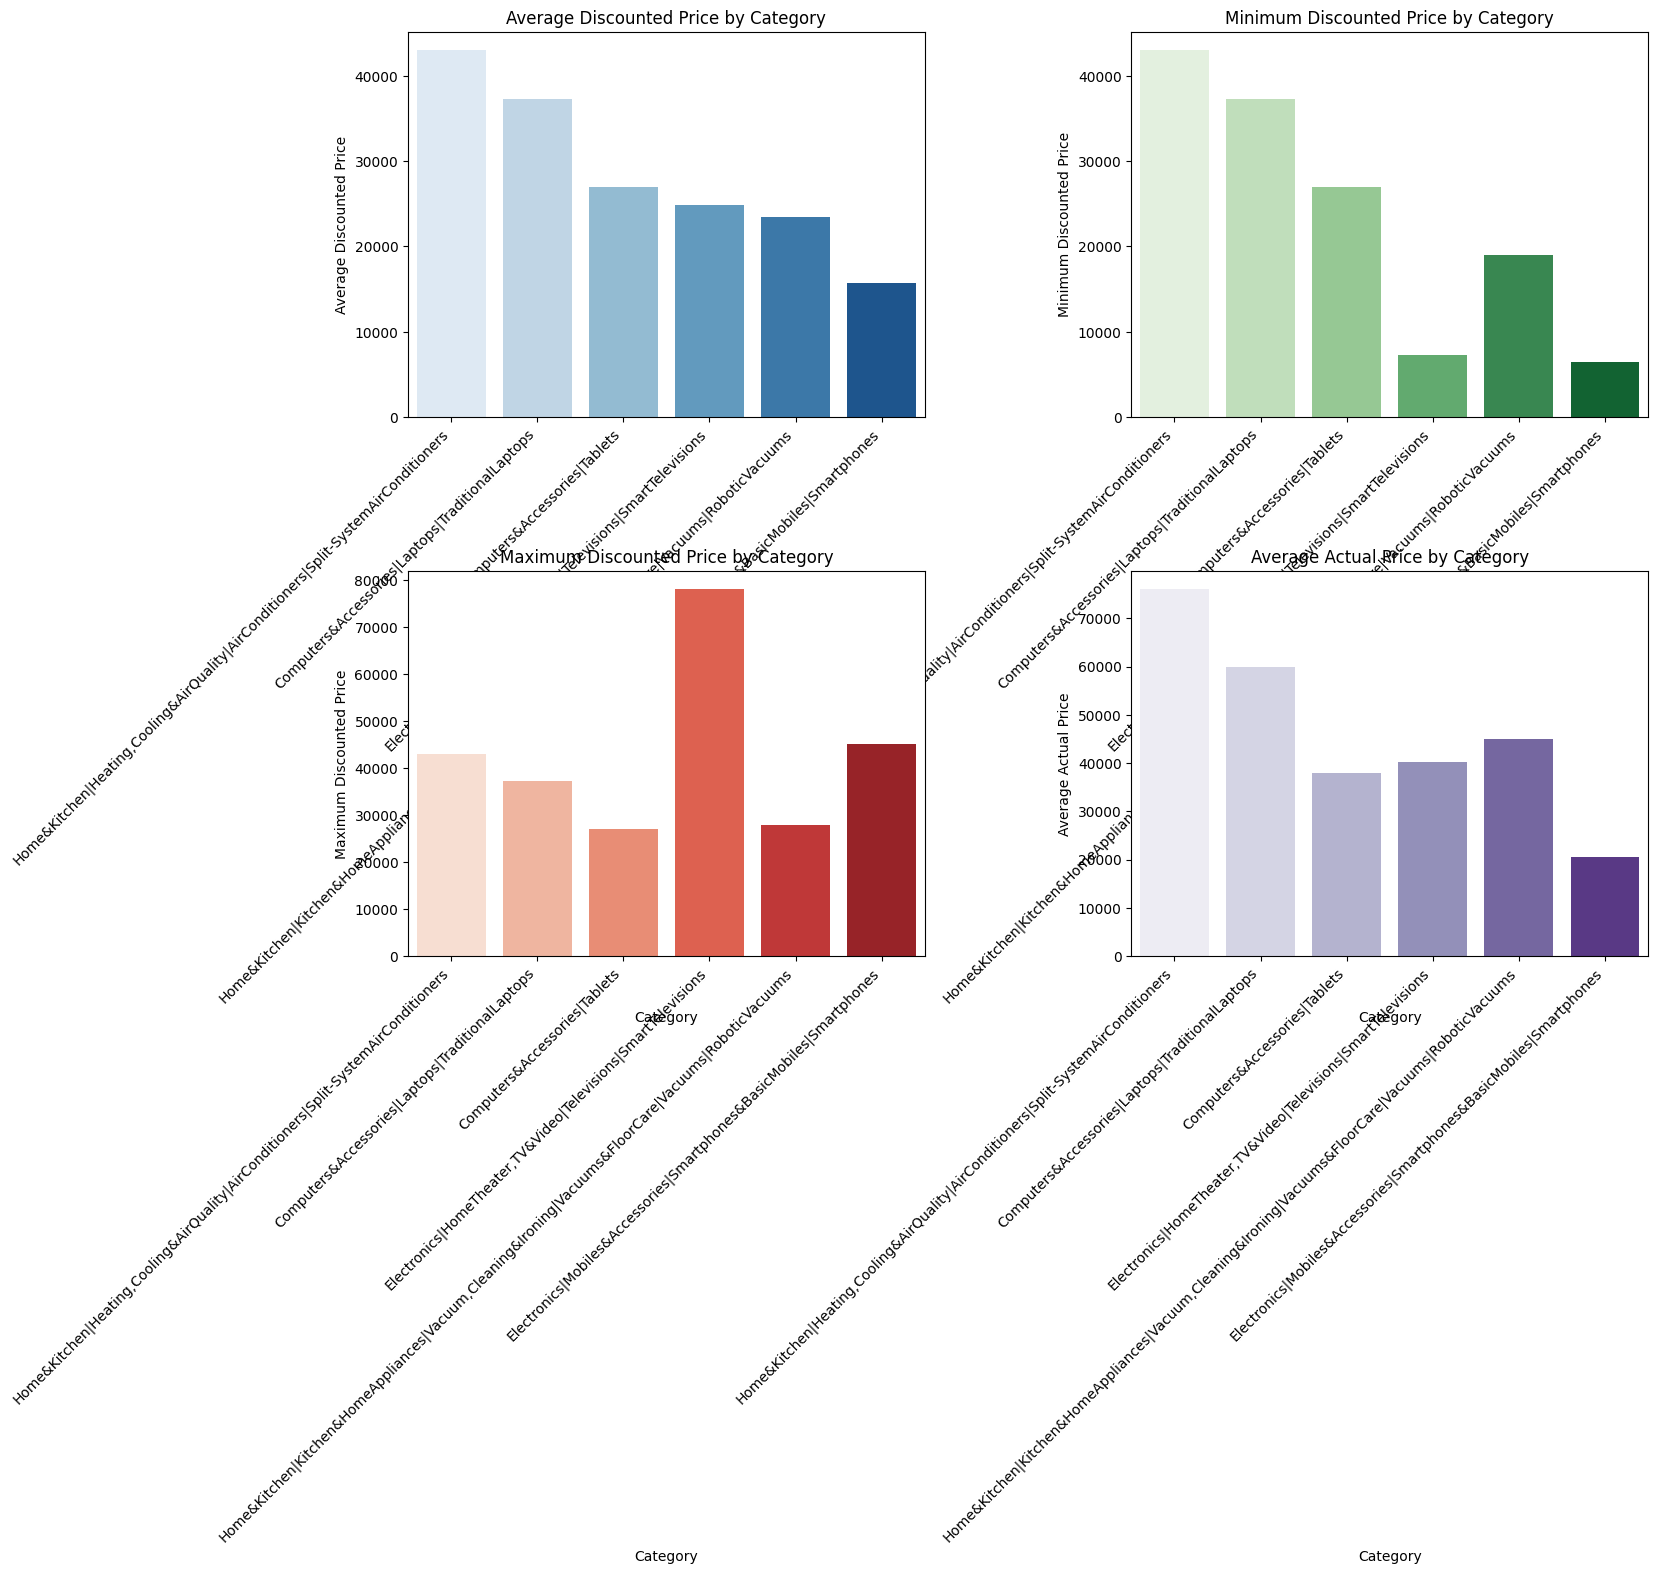

In [8]:
# Select top 6 categories based on average discounted price
top_categories = price_stats.nlargest(6, 'avg_discounted_price')

# Create subplots for the visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased size

# Visualization for avg discounted price
sns.barplot(data=top_categories, x='category', y='avg_discounted_price', ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Average Discounted Price by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Average Discounted Price')

# Visualization for min discounted price
sns.barplot(data=top_categories, x='category', y='min_discounted_price', ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('Minimum Discounted Price by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Minimum Discounted Price')

# Visualization for max discounted price
sns.barplot(data=top_categories, x='category', y='max_discounted_price', ax=axes[1, 0], palette='Reds')
axes[1, 0].set_title('Maximum Discounted Price by Category')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Maximum Discounted Price')

# Visualization for avg actual price
sns.barplot(data=top_categories, x='category', y='avg_actual_price', ax=axes[1, 1], palette='Purples')
axes[1, 1].set_title('Average Actual Price by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Average Actual Price')

# Rotate x-axis labels for better readability
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing

# Show the visualizations
plt.show()

### Insights from Price Analysis:
- **Average Discounted Price**: Categories with higher discounted prices may represent premium products.
- **Price Range**: Minimum and maximum prices within each category help identify budget and high-end products.
- **Discount Impact**: Comparing average discounted and actual prices reveals discount trends across categories.


# **4. RATING ANALYSIS**

We analyze ratings to understand customer satisfaction by calculating the **average rating for each category**.
- Higher ratings may reflect customer satisfaction.
- Lower ratings might indicate potential quality issues or unmet customer expectations.


In [9]:
# Calculate the average rating for each category
category_ratings = amazon_data.groupby('category')['rating'].mean().reset_index(name='average_rating')

# Display the average rating by category
category_ratings


,category,average_rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


### Top 5 Categories by Average Rating

The bar plot below shows the average ratings for the top 5 categories. These categories have the highest average ratings based on the reviews in the dataset.

- **X-Axis**: Categories
- **Y-Axis**: Average Rating
- **Bars**: Each bar represents the average rating of a category, with the highest rated categories appearing on the left.

This plot helps in identifying which product categories are rated the highest by customers.


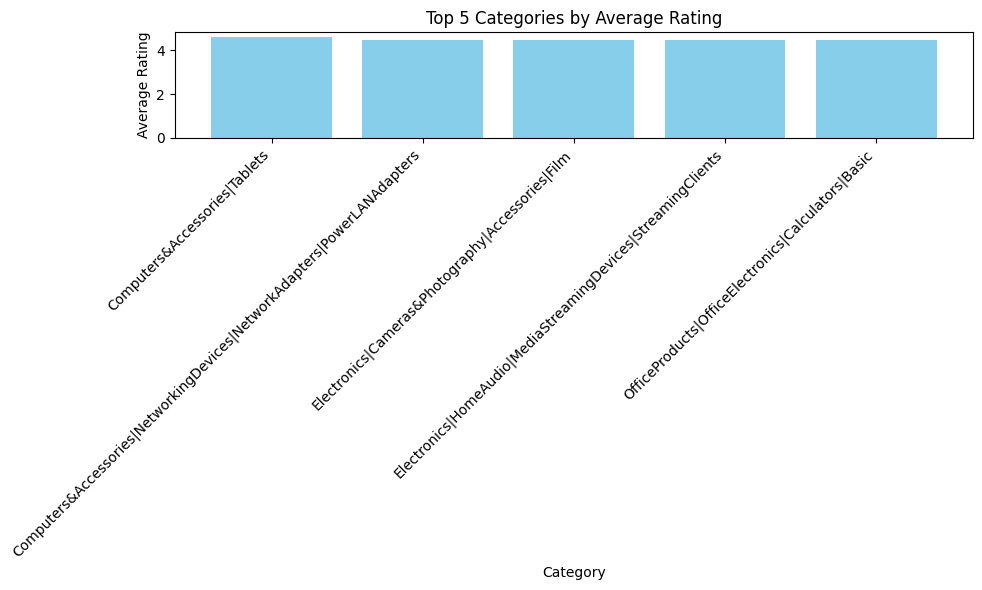

In [10]:
# Sort the DataFrame by average_rating in descending order and select top 5
top_5_categories = category_ratings.sort_values(by='average_rating', ascending=False).head(5)

# Visualization: Bar plot of average ratings by top 5 categories
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['category'], top_5_categories['average_rating'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Top 5 Categories by Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for readability
plt.tight_layout()
plt.show()

### Insights from Rating Analysis:
- **Customer Satisfaction**: Categories with higher ratings generally show more satisfied customers.
- **Quality Indicators**: Categories with lower ratings might face quality or satisfaction issues.
- **Improvement Opportunities**: Categories with average ratings below 4.0 could be reviewed for quality improvements.


# **5. TOP PRODUCTS BY SALES**

We estimate top-selling products using the **rating_count** column. Products with higher review counts likely correlate with higher sales volume.
- We sort products by `rating_count` in descending order.
- The top 10 products with the highest review counts are identified.


In [11]:
# Identify the top-selling products based on review count
top_selling_products = amazon_data[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)

# Display the top-selling products
top_selling_products


,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0


The following code generates a horizontal bar chart to visualize the top-selling products based on their rating count:

```python
# Visualization: Bar chart for rating counts
plt.figure(figsize=(10, 6))

### Table of Top Selling Products

| product_name                                                | rating_count |
|-------------------------------------------------------------|--------------|
| AmazonBasics Flexible Premium HDMI Cable (Black)            | 426973       |
| Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack)        | 426973       |
| Amazon Basics High-Speed HDMI Cable, 6 Feet - 1 Pack        | 426973       |
| AmazonBasics Flexible Premium HDMI Cable (Black)            | 426972       |
| boAt Bassheads 100 in Ear Wired Earphones with Mic          | 363713       |
| boAt Bassheads 100 in Ear Wired Earphones with Mic          | 363713       |
| boAt BassHeads 100 in-Ear Wired Headphones with Mic         | 363711       |
| Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)         | 313836       |
| Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage)         | 313836       |
| Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB Storage)        | 313832       |

### Visualization

Below is the bar plot showing the top-selling products based on review count:


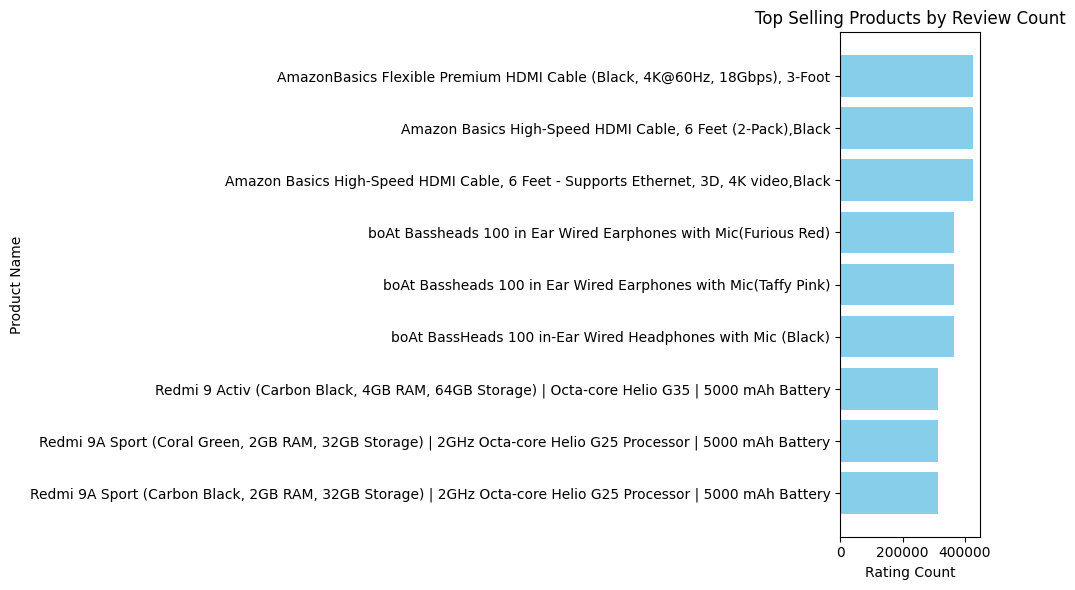

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
plt.barh(top_selling_products['product_name'], top_selling_products['rating_count'], color='skyblue')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.title('Top Selling Products by Review Count')
plt.gca().invert_yaxis()  # To display the highest rated product at the top
plt.tight_layout()
plt.show()

### Insights from Top Products by Sales:
- **Popular Products**: Products with the highest review counts are likely best-sellers.
- **Customer Engagement**: High review counts indicate strong customer engagement, potentially correlating with higher sales.
- **Top Sellers**: These items likely cater well to customer needs and preferences.


# **CONCLUSION**

This analysis provided valuable insights into Amazon's product data:
1. **Price Analysis**: Showed price range and discount trends, helping identify premium and budget-friendly categories.
2. **Rating Analysis**: Unveiled customer satisfaction trends, showing which categories are meeting expectations.
3. **Top Products by Sales**: High review counts helped identify popular products that likely have higher sales.

These insights enable Amazon sellers and platform managers to refine product offerings, improve pricing strategies, and recognize top-performing products.
